# Introduction to Thermodynamics and Statistical Physics

In this lecture, we are going to discuss:

* The Debye theory for a solid.

## The Debye model

The key difference between Einstein's theory and Debye's is that in the Einstein model, it is assumed that all of the atoms are vibrating about their equilibrium positions independantly with the exact same frequency. The Debye model builds on this by allowing the oscillators within the system to have a distribution of frequencies.

Fortunately, we have already developed part of the framework we need for this task. Recalling the definition of the density of states from Lecture 12, we will modify it to represent the density of vibrational states, $g(\omega)$. We will impose the requirement that if we intergate the density of vibrational states over the entire frequency range, we should get back the total number of phonons in our system, $3N$. That is
$$
    \int g(\omega) {\rm d} \omega = 3N
$$

Debye used the following knowledge to determine an appropriate distribution of frequencies - we know that vibrational waves will travel through the solid with a speed equal to the speed of sound of the solid. That is
$$
    \omega = v_{s}q
$$
where q is the wave vector of the lattice vibrations. The density of these vibrations is given as
$$
    g(q) {\rm d} q = \frac{4\pi q^2 {\rm d} q}{(2\pi/L)^3} \times 3
$$
where the factor of 3 comes from the allowed polarisations of the wave, and we have assumed the crystal is a cube of side $L$. Tidying up a bit gives
$$
    g(q) {\rm d} q = \frac{3 V q^2 {\rm d} q}{2\pi^2}
$$
which, in terms of $\omega$, is
$$
    g(\omega) {\rm d} \omega = \frac{3 V \omega^2 {\rm d} \omega}{2\pi^2 v_{s}^3}
$$
The next assumption Debye allowed for is that, since there is a maximum of $3N$ modes in the crystal, there exists a maximum frequency (the Debye frequency) such that
$$
    \int_0^{\omega_{\rm D}} g(\omega) {\rm d} \omega = 3N
$$
which, after substituting in for $g(\omega)$, gives
$$
    \omega_{\rm D} = \left( \frac{6 N \pi^2 v_{\rm s}^3 }{V} \right) ^{1/3}
$$
which also let's us write
$$
    g(\omega) {\rm d} \omega = \frac{9 N \omega^2 {\rm d} \omega}{\omega_{\rm D}^3}
$$
Now, we'll define the Debye temperature as
$$
    \Theta_{\rm D} = \frac{\hbar \omega_{\rm D}}{k_{\rm B}}
$$

So the question we now need to ask is "is the predicted heat capacity versus temperature from this model a better match to our data?". Let's work out an expression for it and see.

Starting with the partition function, we'll have
$$
    \ln(Z) = \int_0^{\omega_{\rm D}} {\rm d} \omega \; g(\omega) \; ln \left[ \frac{e^{-\hbar \omega \beta/2}}{1-e^{-\hbar \omega \beta}} \right]
$$
Breaking this integral up gives
$$
    \ln(Z) = -\int_0^{\omega_{\rm D}} \; \frac{1}{2} \hbar \omega \beta g(\omega)  {\rm d} \omega + \int_0^{\omega_{\rm D}} \; g(\omega) \ln[1-e^{-\hbar \omega \beta}] {\rm d} \omega
$$
which in turn gives
$$
    \ln(Z) = -\frac{9}{8} N \hbar \omega_{\rm D} \beta -\frac{9 N}{\omega_{\rm D}^3} \int_0^{\omega_{\rm D}} \omega^2 \ln[1-e^{-\hbar \omega \beta}] {\rm d} \omega
$$
The internal energy is then
$$
    U = - \frac{\partial \ln(Z)}{\partial \beta} = -\frac{9}{8} N \hbar \omega_{\rm D} + \frac{9 N \hbar}{\omega_{\rm D}^3} \int_0^{\omega_{\rm D}} \frac{\omega^2} {e^{\hbar \omega \beta}-1} {\rm d} \omega
$$
Finally, the heat capacity is then
$$
    C_{\rm V} = \left( \frac{\partial \langle U \rangle}{\partial T} \right)_V
$$
$$
    C_{\rm V} = \frac{9N \hbar}{\omega_{\rm D}^3} \int_0^{\omega_{\rm D}} \frac{-\omega^3 {\rm d} \omega}{e^{\hbar \omega \beta}-1} e^{\hbar \omega \beta} \left( - \frac{\hbar \omega} {k_{\rm B} T^2} \right)
$$
which simplifies to
$$
    C_{\rm V} = \frac{9 R}{x_{\rm D}^3}  \int_0^{x_{\rm D}} \frac{x^4e^{x}}{(e^{x}-1)^2}
$$
where $x=\hbar \beta \omega$ and $x_{\rm D}=\hbar \beta \omega_{\rm D}$.

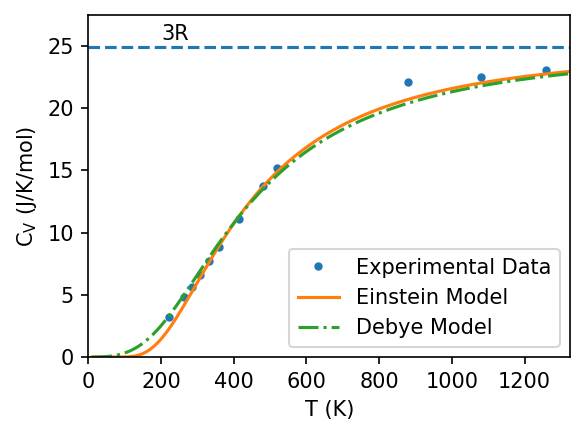

In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
import pandas as pd
import astropy.units as u
import astropy.constants as c

def f(x):
    #This is simply the function in the integral above
    return x**4*np.exp(x)/(np.exp(x)-1)**2

#First, we need to calculate x_D for all temperatures, assuming T_D = 1800*u.K
T_D = 1800*u.K
x_Ds = T_D/T

#We now need to loop over the integration, for each x_D
Cv_Debye = np.array([])*u.J/u.K/u.mol

for x_D in x_Ds:
    res, err = quad(f, 0.0, x_D) # This numerical integration function returns both the integrated value and an estimate of the error
    Cv_Debye = np.append(Cv_Debye,9*c.R*res/x_D**3)

plt.figure(figsize=[4,3], dpi=150)
plt.plot(temp,Cv,'.',label='Experimental Data')
plt.plot(T,Cv_Einstein,'-',label='Einstein Model')
plt.plot(T,Cv_Debye,'-.',label='Debye Model')
plt.axhline(3*c.R.value,linestyle='--')
plt.text(200,25.5, '3R')
plt.xlabel(r"T (K)")
plt.ylabel(r"C$_{\rm V}$ (J/K/mol)")
plt.ylim(0,27.5)
plt.xlim(0,1325)
plt.legend()
plt.tight_layout()
plt.savefig("Figures/Debye_Einstein_Model_vs_Data.jpg")
plt.show()